In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image, display_png
import pydotplus as pdp
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
train = pd.read_csv("train.csv", index_col=0) # 学習用データ
test = pd.read_csv("test.csv", index_col=0)   # 評価用データ

category = ["sex", "smoker", "region"]
nonCategory = ["age", "bmi", "children"]

onehotTrain = train[category]
onehotTest = test[category]
onehotTrain = pd.get_dummies(onehotTrain, dtype=int)
onehotTest = pd.get_dummies(onehotTest, dtype=int)

X = pd.concat([train[nonCategory], onehotTrain], axis=1) # 目的変数を除いたデータ
y = train["charges"] # 目的変数

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=41)

## 決定木


0.86 max_depth = 3


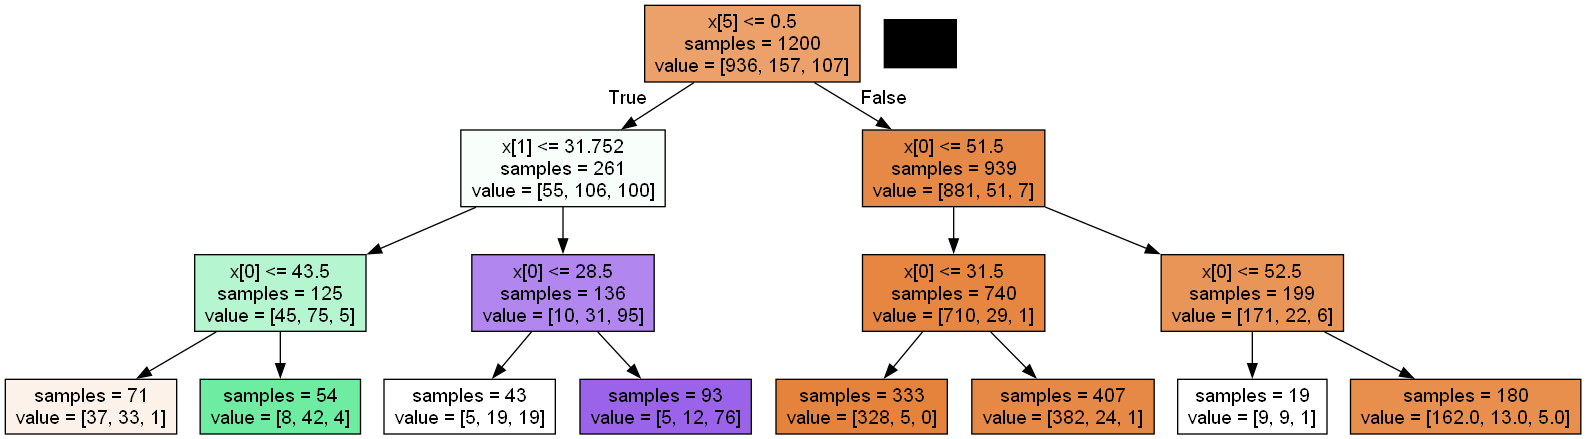

0.8425 max_depth = 4


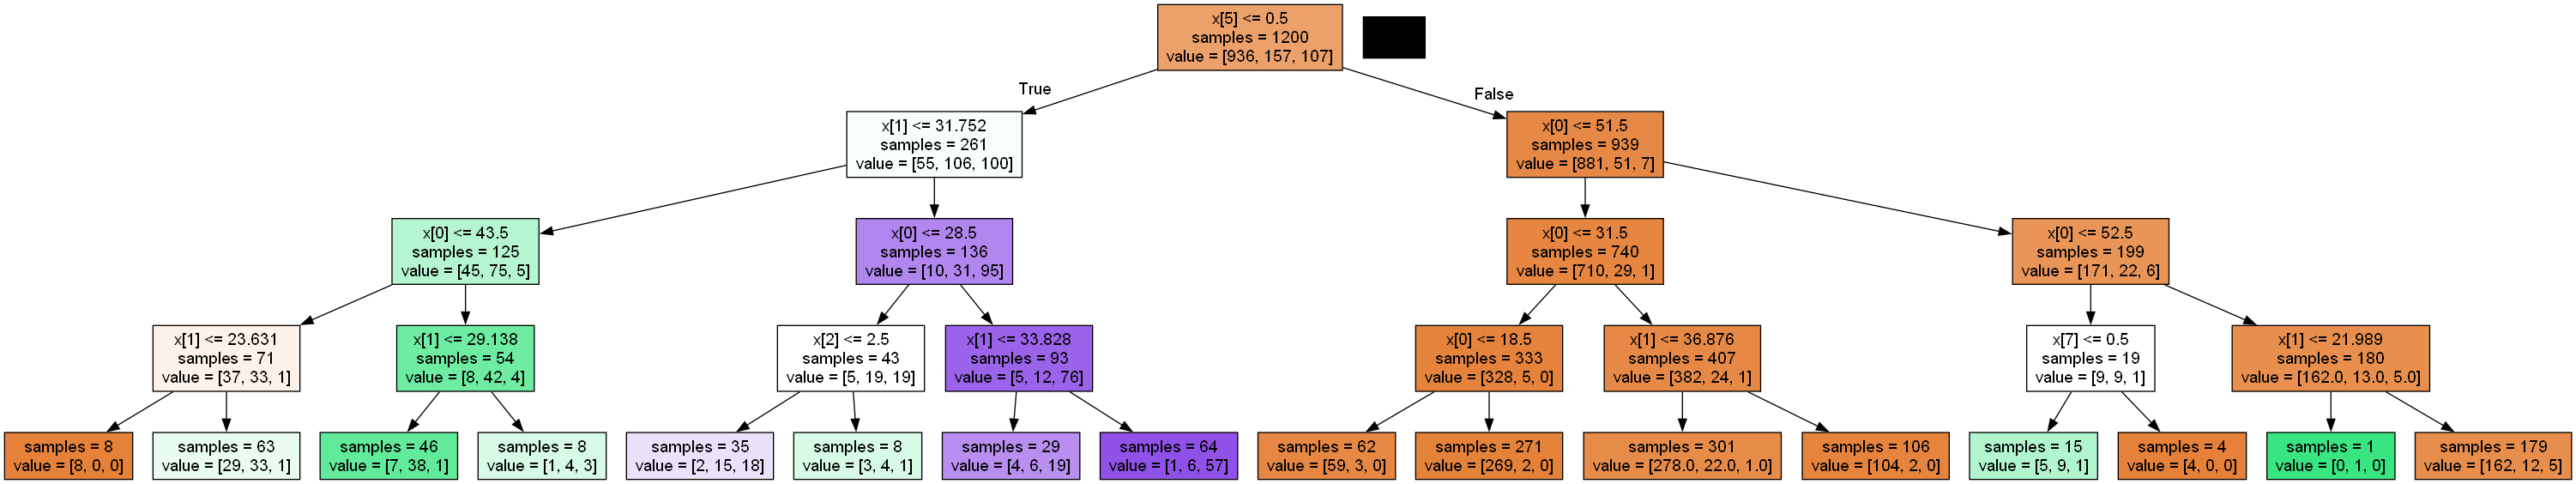

0.815 max_depth = 8


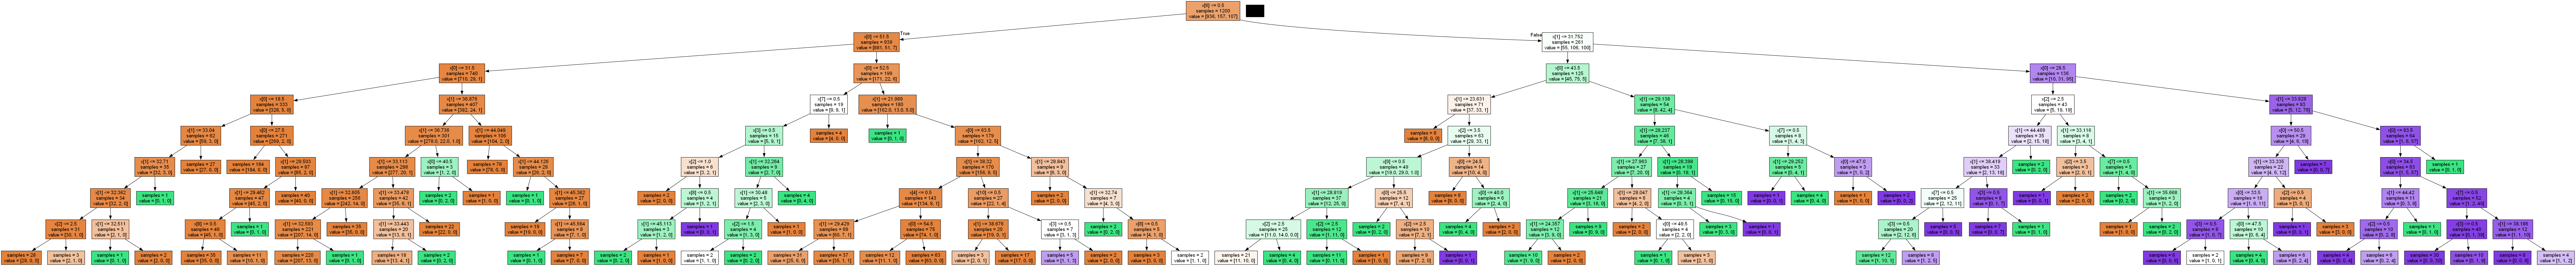

0.8 max_depth = 10


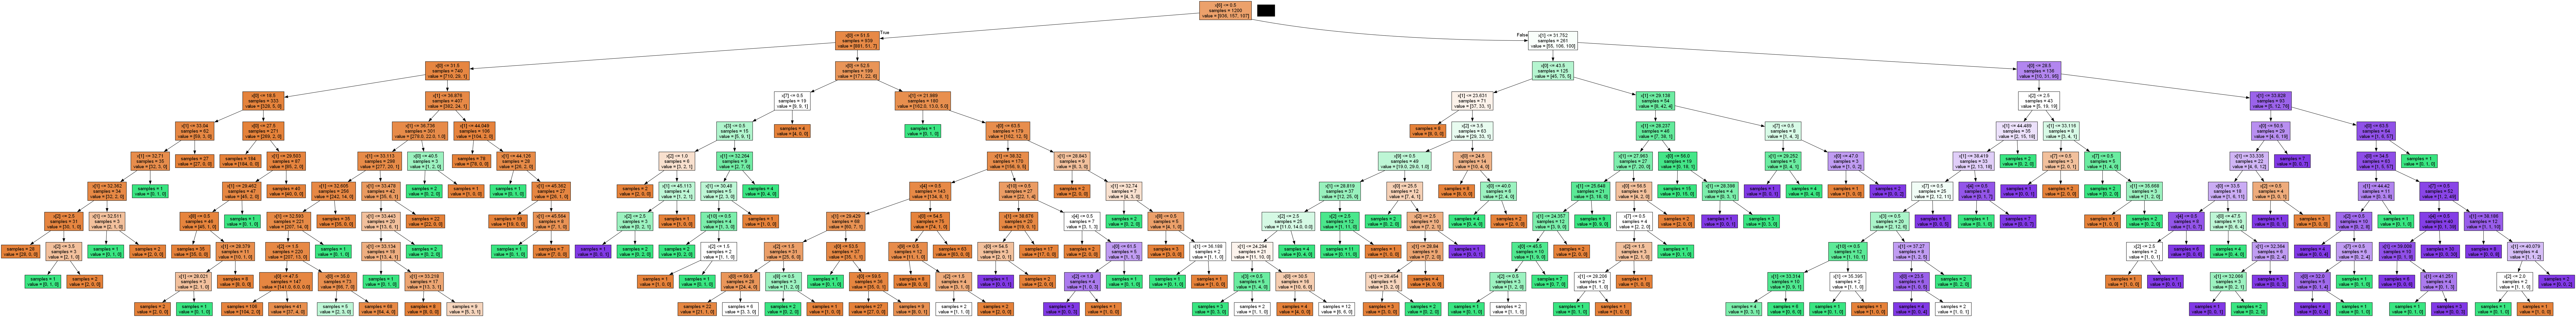

In [21]:
for max_depth in  [3, 4, 8, 10]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test), "max_depth = %s" % (max_depth))
    
# 描画：
    file_name2 = "./decision_tree_%s.png" % (max_depth)
    dot_data = export_graphviz(clf, out_file=None,  impurity = False
               , filled = True)
    
    graph2 = pdp.graph_from_dot_data(dot_data)
    graph2.progs = {'dot': u"C:\\Program Files\\Graphviz\\bin\\dot.exe"}
    graph2.write_png(file_name2)

    # png_file: str
    display_png(Image(file_name2))

## ランダムフォレスト


In [36]:
# for max_depth in  [5, 6, 7, 8, 9, 10, 13]:
for max_depth in  [7]:
    clf = RandomForestClassifier(max_depth=max_depth, n_estimators = 10, random_state = 41)
    clf.fit(X_train, y_train)
    print(clf.score(X_test, y_test), "max_depth = %s" % (max_depth))

0.8625 max_depth = 7


## lightGBM


In [39]:
# データセットの作成
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

# パラメータの設定
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary', # タスクを二値分類に設定
    'metric': ['binary_logloss', 'auc'], # 評価指標を設定
    # 'num_leaves': 31, # 決定木の葉の数
    'learning_rate': 0.1, # 学習率
    # 'feature_fraction': 0.9, # 学習の高速化と過学習の抑制に使用
    # 'bagging_fraction': 0.8, # 学習の高速化と過学習の抑制に使用
    # 'bagging_freq': 5, # baggingを行う頻度
    # 'verbose': -1  # 情報出力レベルを設定
}

# early_stoppingを使用するためのcallbackの設定
early_stopping = lgb.early_stopping(stopping_rounds=10)

# モデルの学習
model = lgb.train(params, train_data, num_boost_round=1000,
                  valid_sets=[test_data], valid_names=['eval'],
                  callbacks=[early_stopping])

# テストデータでの予測
y_pred = model.predict(X_test)


# 予測結果のしきい値処理
y_pred_binary = [2 if prob > 0.67 else 1 if prob > 0.33 else 0 for prob in y_pred]

# 評価
accuracy = accuracy_score(y_test, y_pred_binary)
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_binary))
print('Classification Report:\n', classification_report(y_test, y_pred_binary))

[LightGBM] [Info] Number of positive: 264, number of negative: 936
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 325
[LightGBM] [Info] Number of data points in the train set: 1200, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.220000 -> initscore=-1.265666
[LightGBM] [Info] Start training from score -1.265666
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[16]	eval's binary_logloss: 0.297767	eval's auc: 0.87293
Accuracy: 0.8275
Confusion Matrix:
 [[293  20   7]
 [ 19  10  12]
 [  3   8  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       320
           1       0.26      0.24      0.25        41
           2       0.60      0.72      0.65        39

    accuracy                       

In [40]:
y_pred_binary

[0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,


In [41]:
test = pd.concat([test[nonCategory], onehotTest], axis=1) 

In [44]:
pred = model.predict(test)
pred = [2 if prob > 0.67 else 1 if prob > 0.33 else 0 for prob in pred]

In [45]:
pred

[0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


In [46]:
submit = pd.read_csv("test.csv")[['id']]
submit['charges'] = pred
print(submit)

       id  charges
0      13        0
1      23        2
2      27        0
3      28        0
4      29        0
..    ...      ...
395  1968        0
396  1972        0
397  1979        2
398  1983        0
399  1995        0

[400 rows x 2 columns]


In [47]:
fileName = 'submit.csv'
submit.to_csv(fileName, header=None, index=False)
print("Your submission was successfully saved!  : " + fileName)

Your submission was successfully saved!  : submit.csv
